# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#dc322f; font-size:140%; text-align:center; border-radius:25px 60px;">Marketing A/B Testing</p>

<img src="https://www.travelpayouts.com/blog/wp-content/uploads/2018/11/ab-testing.jpg" alt="ABTest">

<a id="table of content"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Table of Content</p>

<a id="contents_tabel"></a>   

* [1. Importing Libraries](#1)
    
* [2. Loading the Dataset](#2)
    
* [3. Dataset Overview](#3)  
    
* [4. EDA & Visualization](#4)  

* [5. Hypotheses](#5)
    
* [6. Chi2Test](#6)

* [7. ABTest (BINOMIAL distribution)](#7)

* [8. ABTest (from scratch)](#8)

* [9. T-Test](#9)

* [10. Additional Statistics Test](#10)

<a id="1"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Importing Libraries</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

<a id="2"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Loading the Dataset</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [32]:
!gdown --id 1W7G-vrzvazCVtlw36CVSlYpaT3Vjnrzi

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W7G-vrzvazCVtlw36CVSlYpaT3Vjnrzi
To: /content/marketing_AB.csv
100% 22.0M/22.0M [00:00<00:00, 173MB/s]


In [2]:
data = pd.read_csv('marketing_AB.csv')

<a id="3"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Dataset Overview</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The following table shows the names of each variable (column) and their description:
</p>
<br>
    <br>


<table align="center" rules="all"  style="width: 100%;font-family:'Comic Sans MS', cursive;">

  <thead>
    <tr style="background-color: #fdf6e3;border: 3px solid black;">
      <th style="width:35%; text-align:center; font-weight: bold;color:#000080; font-size: 18px;">Variable Name</th>
      <th style="text-align:center; font-weight: bold;color:#000080; font-size: 18px;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: white;border: 1px solid black;border-color:grey ">
      <td style="text-align:left; font-size: 16px;color:#000080">user id</td>
      <td style="text-align:left; font-size: 14px;color:#000080">  User ID (unique).</td>
    </tr >
    <tr style="background-color: white;border: 1px solid black;border-color:grey">
      <td style="text-align:left;font-size: 16px;color:#000080" >test group</td>
      <td style="text-align:left;font-size: 14px;color:#000080">If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement </td>
    </tr>
    <tr style="background-color: white;border: 1px solid black;border-color:grey">
      <td style="text-align:left; font-size: 16px;color:#000080 ">converted</td>
      <td style="text-align:left;font-size: 14px;color:#000080">If a person bought the product then True, else is False.</td>
    </tr>
    <tr style="background-color: white;border: 1px solid black;border-color:grey">
      <td style="text-align:left;font-size: 16px;color:#000080 ">total ads</td>
      <td style="text-align:left;font-size: 14px;color:#000080">Amount of ads seen by person </td>
    </tr>
    <tr style="background-color: white;border: 1px solid black;border-color:grey">
      <td style="text-align:left;font-size: 16px;color:#000080">most ads day</td>
      <td style="text-align:left;font-size: 14px;color:#000080">Day that the person saw the biggest amount of ads </td>
    </tr>
    <tr style="background-color: white;border: 1px solid black;border-color:grey">
      <td style="text-align:left;font-size: 16px;color:#000080 ">most ads hour</td>
      <td style="text-align:left;font-size: 14px;color:#000080">Hour of day that the person saw the biggest amount of ads.</td>
    </tr>
  </tbody>
</table>

In [3]:
data.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
print(f'The Shape of Dataset:\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset:
Number of rows: 588101
Number of columns: 7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
Unnamed: 0       588101 non-null int64
user id          588101 non-null int64
test group       588101 non-null object
converted        588101 non-null bool
total ads        588101 non-null int64
most ads day     588101 non-null object
most ads hour    588101 non-null int64
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
print(f'Null values in each column:\n{data.isnull().sum()}')

Null values in each column:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">According to the above result, There aren't missing values in this dataset.
</p>

In [7]:
print(f'Unique values in each column:\n{data.nunique()}')

Unique values in each column:
Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64


In [8]:
data.duplicated().sum()

0

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>💭Insights💭</strong>:
    <ul style="text-align: left;">
        <li>We can see that there aren't duplicated instances in this dataset.</li>
        <li>Furthermore, we can drop <strong>user_id</strong> and <strong>Unnamed: 0</strong> because these columns have many unique values.</li>
    </ul>
</div>

In [9]:
data.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

<a id="4"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> EDA & Visualization</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [10]:
data.describe(include='all')

,test group,converted,total ads,most ads day,most ads hour
count,588101,588101,588101.000000,588101,588101.000000
unique,2,2,NaN,7,NaN
top,ad,False,NaN,Friday,NaN
freq,564577,573258,NaN,92608,NaN
mean,NaN,NaN,24.820876,NaN,14.469061
std,NaN,NaN,43.715181,NaN,4.834634
min,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,4.000000,NaN,11.000000
50%,NaN,NaN,13.000000,NaN,14.000000
75%,NaN,NaN,27.000000,NaN,18.000000


In [11]:
data_psa = data[data['test group']=='psa']
data_ad = data[data['test group']=='ad']
print(f'====================== OBSERVATIONS ======================')
print(f"The number of instances that have seen advertisement (ad group): {data_ad.shape[0]}")
print(f"The number of instances that have not seen advertisement(psa group): {data_psa.shape[0]}\n")

print(f'========================== MEAN ==========================')
print(f"The mean of converted instances (True converted): {data['converted'].mean()*100:.2f}%")
print(f"The mean of not converted instances (False converted): {100-data['converted'].mean()*100:.2f}%")
print(f"The mean of converted instances in the ad group: {data_ad['converted'].mean()*100:.2f}%")
print(f"The mean of converted instances in the psa group: {data_psa['converted'].mean()*100:.2f}%")

====================== OBSERVATIONS ======================
The number of instances that have seen advertisement (ad group): 564577
The number of instances that have not seen advertisement(psa group): 23524

========================== MEAN ==========================
The mean of converted instances (True converted): 2.52%
The mean of not converted instances (False converted): 97.48%
The mean of converted instances in the ad group: 2.55%
The mean of converted instances in the psa group: 1.79%


<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>💭Insights💭</strong>
    <ul style="text-align: left;">
        <li>According to the above results, Most people in this dataset have seen advertisements.</li>
        <li>Furthermore, we can see that the people in the <strong>ad group</strong> buy more than the <strong>psa group</strong>.</li>
    </ul>
</div>


In [12]:
# visualization style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

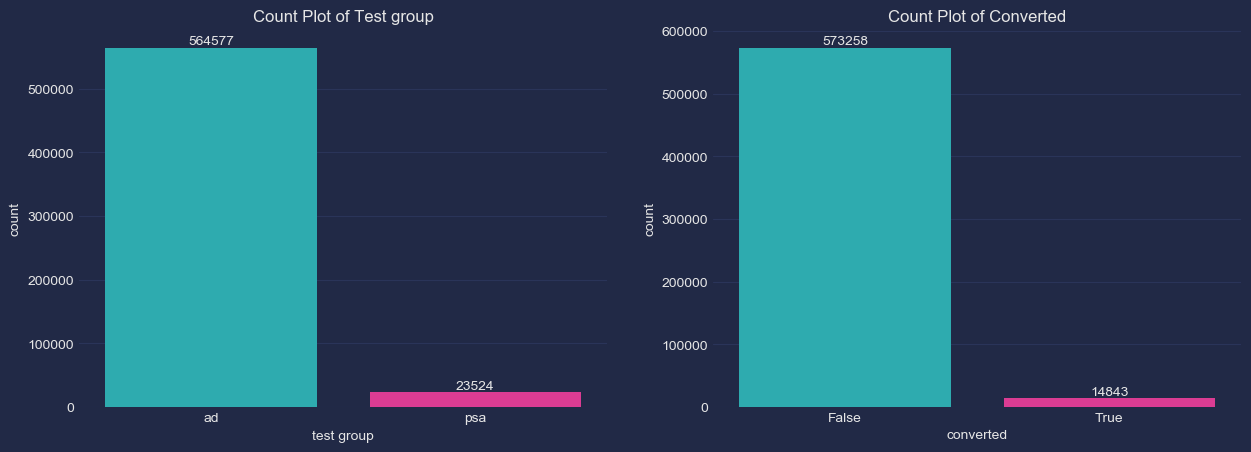

In [13]:
columns_to_plot = ['test group', 'converted']

fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), dpi=100)

for i, col in enumerate(columns_to_plot):
    # Count plot for the current column with count labels
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(f'Count Plot of {col.capitalize()}')
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

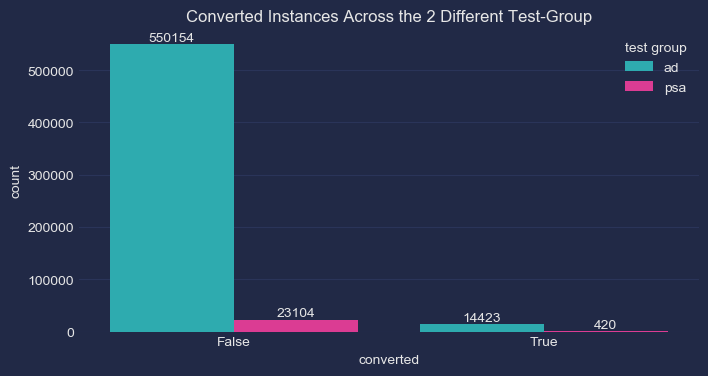

In [14]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=data, x='converted', hue='test group')
plt.title('Converted Instances Across the 2 Different Test-Group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>💭Insights💭</strong>:
    <ul style="text-align: left;">
        <li>These charts show that the people in the <strong>ad group</strong> bought much more than the <strong>psa group</strong>. َSo, according to the above results, a <strong>hypothesis</strong> can be that advertising is an important indicator for sales increase.</li>
        <li>To evaluate this hypothesis and also to understand that there is a <strong>significant difference</strong> between the <strong>ad</strong> and <strong>psa</strong> groups, we should take <strong>Statistics Tests</strong> such as <strong>ABTest</strong>, and <strong>Independent TTest</strong>.</li>
        <li>In addition, to find the relation between the <strong>test group</strong> and the <strong>converted</strong>, we should use <strong>Chi2Test</strong>.</li>
    </ul>
</div>




<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">Before evaluating the Chi2Test and ABTest, I decided to plot two more charts to consider <strong>most ads day</strong> and <strong>most ads hour</strong> features in this notebook.
</p>

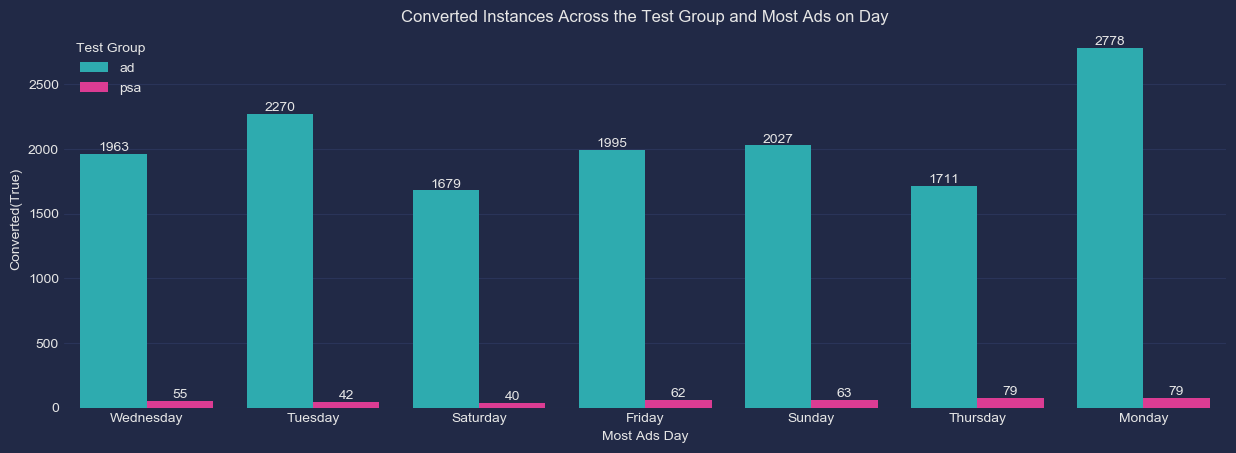

In [15]:
# Create a count plot for 'test group', 'most ads day', and 'converted' values
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(data=data[data['converted'] == True], x='most ads day', hue='test group')

plt.title('Converted Instances Across the Test Group and Most Ads on Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Converted(True)')
plt.legend(title='Test Group', loc='upper left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

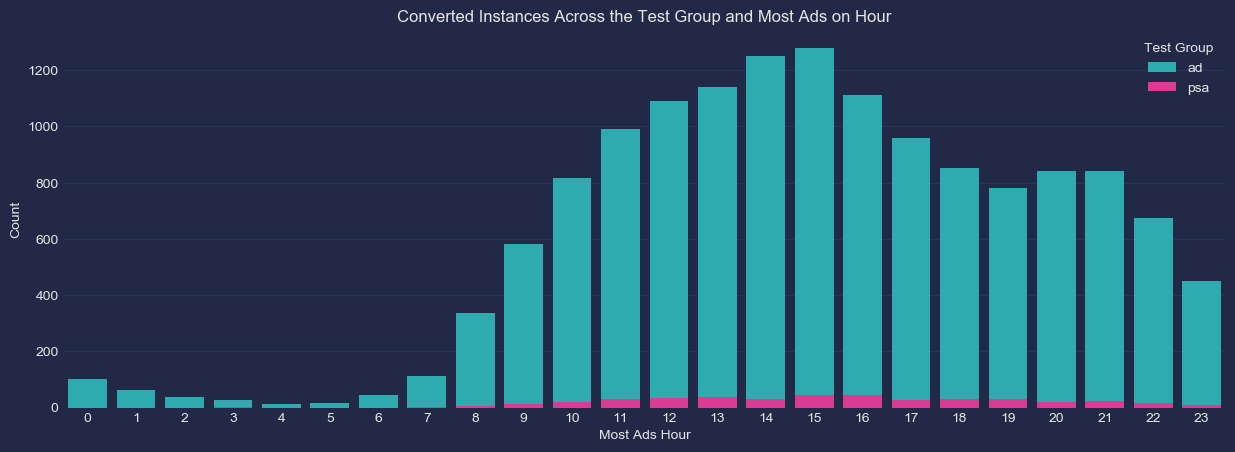

In [16]:
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(x='most ads hour', hue='test group', data=data[data['converted'] == True], dodge=False)
plt.title('Converted Instances Across the Test Group and Most Ads on Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Count')
plt.legend(title='Test Group')
plt.show()

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>💭Insights💭</strong>:
    <ul style="text-align: left;">
        <li>Most purchases occur on Mondays compared to other days.</li>
        <li>In addition, people are more interested in shopping during the afternoon, especially between 14:00 and 15:00.</li>
    </ul>
</div>


<a id="5"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Hypothesis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Hypotheses:</strong>
    <ol style="text-align: left;">
        <li><strong>Null Hypothesis (H0):</strong> There is no <em>significant difference</em> in <strong>buying behavior</strong> between the <strong>ad and psa groups</strong>.</li>
        <li><strong>Alternative Hypothesis (H1):</strong> There is a <em>significant difference</em> in <strong>buying behavior</strong> between the <strong>ad and psa groups</strong>. (The alternative hypothesis contradicts the null hypothesis, suggesting that there is a significant difference between the means of the two groups.)</li>
    </ol>
</div>

<a id="6"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Chi2Test</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Chi-square Test:</strong>
    <p>The <strong>chi-square test</strong> for independence is suitable for comparing categorical variables to determine if they are independent or associated. In this case, it can help determine if there's a significant difference in <strong>buying behavior between the ad and psa groups</strong>.</p>
    <ul style="text-align: left;">
        <li>Chi-square test measures the association between two <strong>categorical variables</strong>. It compares the observed frequencies of the categories with the frequencies that would be expected if the two variables were independent.</li>
        <li>The test generates a chi-square statistic and a <strong>p-value</strong>. A low p-value indicates that the variables are dependent, rejecting the null hypothesis.</li>
    </ul>
</div>

<div style="background-color:#87CEEB; padding:15px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <p>There are two approaches to calculate the Chi2Test:</p>
    <ol style="text-align: left;">
        <li>From scratch</li>
        <li>Using stats.chi2_contingency</li>
    </ol>
    <p>It should be mentioned that in both approaches, in the first step, we should create a <em>crosstab</em> between <strong>converted</strong> and <strong>test group</strong> columns.</p>
</div>


In [17]:
chi2 = pd.crosstab(data['converted'], data['test group'], margins=True)
chi2

test group,ad,psa,All
converted,,,
False,550154,23104,573258
True,14423,420,14843
All,564577,23524,588101


In [18]:
# Chi2Test from the scratch

# observation
obs = np.append(chi2.iloc[0][: -1].values, chi2.iloc[1][: -1].values)

row_sum = chi2.iloc[0: 2, 2].values

# calculation
exp = []
for j in range(2):
    for val in chi2.iloc[2, : -1].values:
        # print(val, ' * ', row_sum[j], ' / ', chi2.loc['All', 'All'], ' = ', val * row_sum[j] / chi2.loc['All', 'All'])
        exp.append(val * row_sum[j] / chi2.loc['All', 'All'])

# degree of freedom
dof = (len(row_sum) - 1) * (len(chi2.iloc[2, :-1].values) - 1)

# converted vs test group
print(f'The result of Chi2Test:\ndof = {dof}\nP-value = {1 - stats.chi2.cdf(((obs - exp) ** 2 / exp).sum(), dof)}')

The result of Chi2Test:
dof = 1
P-value = 1.7053025658242404e-13


In [19]:
# Chi2Test from stats

obs = np.array([chi2.iloc[0][: -1].values, chi2.iloc[1][: -1].values])
statistic, pvalue, dof, expected_freq = stats.chi2_contingency(obs)
print(f'The result of Chi2Test:\nChi-square statistic = {statistic:.2f}\nDegree of Freedom = {dof}\nP-value = {pvalue:.2f}')


The result of Chi2Test:
Chi-square statistic = 54.01
Degree of Freedom = 1
P-value = 0.00


<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>💭Insights💭</strong>:
    <p>The P-value is close to 0, which means there is good evidence to reject the null hypothesis. Our threshold rejecting the Null is usually less than 0.05.</p>
    <p>So, according to the result of the <em>Chi2Test</em>, we can see that there is a relation between the <strong>test group</strong> and <strong>converted</strong> features.</p>
</div>


<a id="7"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> ABTest (BINOMIAL distribution)</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">For evaluating the ABTest between the <strong>ad</strong> and <strong>psa</strong>, we can use <strong>binomial distribution</strong> according to the following code blocks.
</p>
<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;"><strong>Binomial Distribution</strong> models success/failure in each group.
</p>

In [20]:
ad_converted = np.random.choice([1, 0], size=len(data_ad), p=[data.converted.mean(), (1 - data.converted.mean())])
psa_converted = np.random.choice([1, 0], size=len(data_psa), p=[data.converted.mean(), (1 - data.converted.mean())])

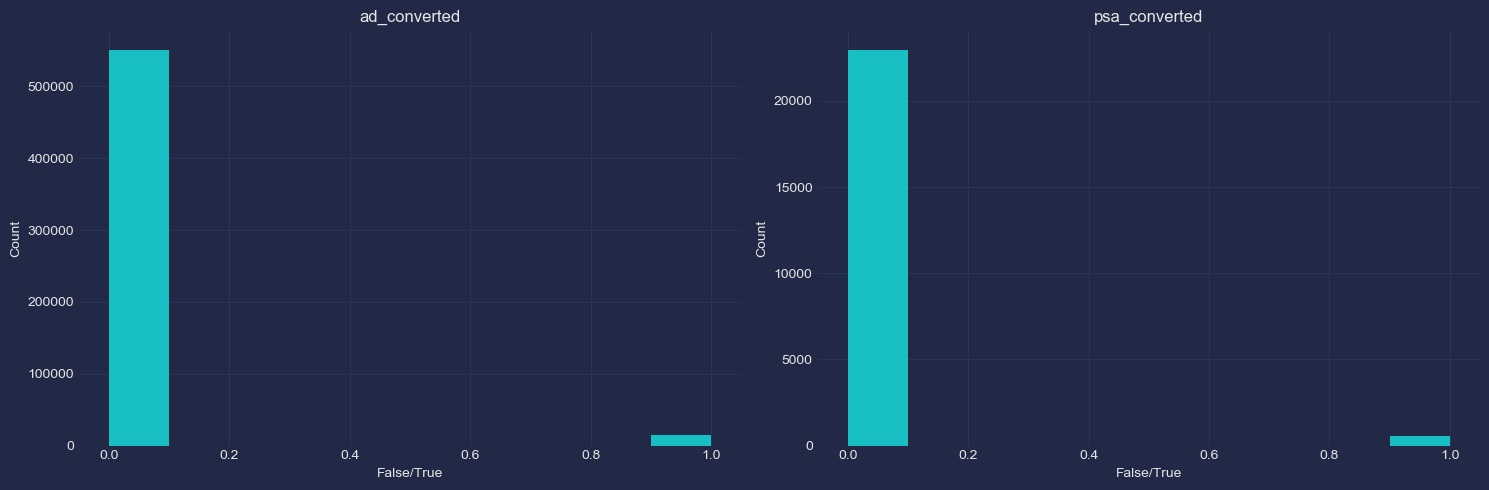

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=100)
ax1.hist(ad_converted);
ax2.hist(psa_converted);
ax1.set(title='ad_converted', xlabel='False/True', ylabel='Count');
ax2.set(title='psa_converted', xlabel='False/True', ylabel='Count');
plt.tight_layout()

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Step 1: Generating Random Samples</strong>
    <p>Using numpy's <code>random.binomial()</code> function, random samples of conversions are generated for both the ad and psa groups.</p>
    <p>The number of trials is set to the length of each group, and the probability of success (conversion rate) is set to the overall conversion rate from the entire dataset.</p>
    <strong>Step 2: Calculating Differences</strong>
    <p>Differences in conversion rates between the ad and psa groups are computed for each random sample.</p>
    <p>Additionally, the actual difference in conversion rates between the ad and psa groups in the original dataset is calculated.</p>
    <strong>Step 3: Printing Results</strong>
    <p>The mean of differences of conversion rates from the random samples and the mean difference from the original dataset are printed.</p>
    <p>The p-value is calculated as the proportion of random samples that have a difference greater than the actual difference observed in the original dataset.</p>
</div>


In [22]:
# Generate random samples for ad and psa groups
ad_converted = np.random.binomial(len(data_ad), data.converted.mean(), 10000) / len(data_ad)
psa_converted = np.random.binomial(len(data_psa), data.converted.mean(), 10000) / len(data_psa)

# Calculate differences
p_diffs = ad_converted - psa_converted
ab_data_diff = data_ad['converted'].mean() - data_psa['converted'].mean()

# Print results
print("Results of AB Test Simulation:")
print("----------------------------------------------------")
print(f"Mean difference of randomly generated instances: {p_diffs.mean():.5f}")
print(f"Actual difference between ad and psa groups: {ab_data_diff:.5f}")
p_value = (p_diffs > ab_data_diff).mean()
print(f"P-value: {p_value * 100:.2f}%")
print("----------------------------------------------------")
if p_value < 0.05:
    print("There is a significant difference in conversion rates between ad and psa groups.")
else:
    print("There is no significant difference in conversion rates between ad and psa groups.")


Results of AB Test Simulation:
----------------------------------------------------
Mean difference of randomly generated instances: 0.00001
Actual difference between ad and psa groups: 0.00769
P-value: 0.00%
----------------------------------------------------
There is a significant difference in conversion rates between ad and psa groups.


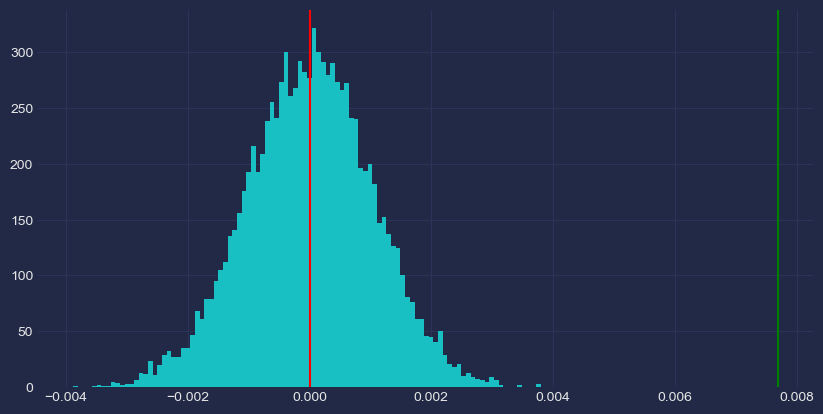

In [23]:
plt.figure(figsize=(10, 5), dpi=100)
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The differences between the green and red lines of the above chart confirm that there is a <strong>significant difference</strong> in conversion rates between <strong>ad</strong> and <strong>psa</strong> groups.
</p>

<a id="8"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> ABTest (from scratch)</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [24]:
psa = np.array(data[data['test group']=='psa']['converted'])
ad = np.array(data[data['test group']=='ad']['converted'])

converted = np.array([
    np.append(np.zeros(len(psa)), np.ones(len(ad))),
    np.append(psa, ad)
])
converted_t = converted.T

In [25]:
def ABTest(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(converted_t))
        experiment_data = np.array([
            experiment_label,
            converted_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [26]:
AB_test = ABTest(1000)
p_value = len(AB_test[AB_test >= ab_data_diff])/ 1000 * 100
print(f"The p-value in ABTest is: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in conversion rates between ad and psa groups.")
else:
    print("There is no significant difference in conversion rates between ad and psa groups.")

The p-value in ABTest is: 0.0
There is a significant difference in conversion rates between ad and psa groups.


<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">This result rejects null hypotheses. In other words, there's a statistical difference between the <strong>ad</strong> and <strong>psa</strong> groups in purchases.
</p>

<a id="9"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> TTest</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:12px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>💭TTest💭</strong>:
    <p>The <strong>T-Test</strong> calculates a test statistic (t-value) based on the means and standard deviations of the two groups, along with the sample sizes. This t-value is then compared to a critical value from the t-distribution to determine statistical significance.</p>
    <p>One of the key assumptions of the T-Test is that the data within each group follows a <strong>normal distribution.</strong></p>
    <P>Since <strong>test group</strong> and <strong>converted</strong> columns are categorical (non-continuous), we cannot check for normality directly. Instead, we should check whether the assumptions of the T-test hold for the data. This includes:
    
1. Both groups are independent.
    
2. The samples are approximately normally distributed.

3. Homogeneity of variances.

<P>So, the T-test is not suitable for this dataset since it requires continuous data. To check the normality of the data, we can use the <strong>Shapiro-Wilk</strong> test for each group separately.</p>
    </p>
</div>

In [37]:
ad_group = data[data['test group'] == 'ad']['converted']
psa_group = data[data['test group'] == 'psa']['converted']

stat_ad, p_ad = shapiro(ad_group)
stat_psa, p_psa = shapiro(psa_group)

print("Shapiro-Wilk Test - Ad Group: Statistic=%.3f, p-value=%.3f" % (stat_ad, p_ad))
print("Shapiro-Wilk Test - PSA Group: Statistic=%.3f, p-value=%.3f" % (stat_psa, p_psa))

Shapiro-Wilk Test - Ad Group: Statistic=0.142, p-value=0.000
Shapiro-Wilk Test - PSA Group: Statistic=0.110, p-value=0.000


C:\Users\Abbas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Abbas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">When the p-value of the Shapiro-Wilk test is less than 0.05 (significant level), it indicates that the data does not follow a normal distribution. So, for this dataset, we can't use T-Test.
</p>

<a id="10"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Additional Statistics Test</p>
⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">The <a href="https://www.statstest.com">www.statstest.com</a> helps us to choose the appropriate test for our dataset. According to this website, I got this result:
</p>

<img src="G-Test.jpg" alt="G-Test">

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>G-test</strong>
    <p>The <strong>G-test</strong> (also known as the <strong>likelihood ratio test</strong>) is similar to the chi-square test but has some advantages, especially when dealing with small sample sizes. It's particularly useful when expected cell frequencies are small.</p>
    <ul style="text-align: left;">
        <li>The <strong>G-test</strong> measures the difference between <strong>observed and expected</strong> frequencies under the null hypothesis.</li>
        <li>It calculates the <strong>likelihood ratio</strong> between the <strong>observed data</strong> and the <strong>expected data</strong>.</li>
    </ul>
</div>


In [38]:
# G-Test
contingency_table = pd.crosstab(data['test group'], data['converted'])
g_stat, p_val, _, _ = stats.chi2_contingency(contingency_table, lambda_="log-likelihood")
print("G-test statistic:", g_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in conversion rates between the ad and psa groups using G-test.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in conversion rates between the ad and psa groups using G-test.")

G-test statistic: 59.782230158204584
P-value: 1.059557167561035e-14
Reject Null Hypothesis: There is a significant difference in conversion rates between the ad and psa groups using G-test.


<p style="font-family:Comic Sans MS', cursive; font-size:120%; color:#2AAA8A;">We can conclude that the G-Test confirms the result of the Chi-square-Test.
</p>

# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Thanks for your attention</p>